In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import Birch, AffinityPropagation
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score,silhouette_score, pairwise_distances_argmin_min
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

In [6]:
%pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


You should consider upgrading via the 'C:\Users\charl\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
#Read initial data
file_path='CSV_ETS295_class_smote_5_100(clustering).xlsx'
df = pd.read_excel(file_path)
column_names = 'TSPYL5(AL080059),ALDH4A1(NM_003748),MMP9(NM_004994),WISP1(NM_003882),SERF1A(AF073519),TGF?3(NM_003239),SMIM5(Contig24252_RC),HRASLS1(NM_020386),ECI2(NM_006117),DTL(NM_016448),Contig63649_RC,Contig46218_RC,NM_016359,AA555029_RC,Contig38288_RC,NM_003862,Contig28552_RC,Contig32125_RC,U82987,AL137718,AB037863,NM_020188,NM_020974,NM_000127,NM_002019,NM_002073,NM_000436,Contig55377_RC,Contig35251_RC,Contig25991,NM_003875,NM_006101,NM_003607,AF052162,NM_000849,Contig32185_RC,NM_016577,Contig48328_RC,Contig46223_RC,NM_015984,AK000745,Contig40831_RC,NM_014791,X05610,NM_018401,NM_000788,Contig51464_RC,AL080079,NM_006931,AF257175,NM_014321,NM_002916,Contig55725_RC,AF201951,NM_005915,NM_001282,Contig56457_RC,NM_000599,NM_014889,AF055033,NM_006681,NM_007203,Contig63102_RC,NM_003981,Contig20217_RC,NM_001809,Contig2399_RC,NM_004702,NM_007036,NM_018354'
column_names_list = column_names.split(',')
# Split the values in the single column into multiple columns
new_columns = df['TSPYL5(AL080059),ALDH4A1(NM_003748),MMP9(NM_004994),WISP1(NM_003882),SERF1A(AF073519),TGF?3(NM_003239),SMIM5(Contig24252_RC),HRASLS1(NM_020386),ECI2(NM_006117),DTL(NM_016448),Contig63649_RC,Contig46218_RC,NM_016359,AA555029_RC,Contig38288_RC,NM_003862,Contig28552_RC,Contig32125_RC,U82987,AL137718,AB037863,NM_020188,NM_020974,NM_000127,NM_002019,NM_002073,NM_000436,Contig55377_RC,Contig35251_RC,Contig25991,NM_003875,NM_006101,NM_003607,AF052162,NM_000849,Contig32185_RC,NM_016577,Contig48328_RC,Contig46223_RC,NM_015984,AK000745,Contig40831_RC,NM_014791,X05610,NM_018401,NM_000788,Contig51464_RC,AL080079,NM_006931,AF257175,NM_014321,NM_002916,Contig55725_RC,AF201951,NM_005915,NM_001282,Contig56457_RC,NM_000599,NM_014889,AF055033,NM_006681,NM_007203,Contig63102_RC,NM_003981,Contig20217_RC,NM_001809,Contig2399_RC,NM_004702,NM_007036,NM_018354'].str.split(',', expand=True)
# Concatenate the new columns with the original DataFrame
df = pd.concat([df, new_columns], axis=1)

# Drop the original column with comma-separated values
df = df.drop('TSPYL5(AL080059),ALDH4A1(NM_003748),MMP9(NM_004994),WISP1(NM_003882),SERF1A(AF073519),TGF?3(NM_003239),SMIM5(Contig24252_RC),HRASLS1(NM_020386),ECI2(NM_006117),DTL(NM_016448),Contig63649_RC,Contig46218_RC,NM_016359,AA555029_RC,Contig38288_RC,NM_003862,Contig28552_RC,Contig32125_RC,U82987,AL137718,AB037863,NM_020188,NM_020974,NM_000127,NM_002019,NM_002073,NM_000436,Contig55377_RC,Contig35251_RC,Contig25991,NM_003875,NM_006101,NM_003607,AF052162,NM_000849,Contig32185_RC,NM_016577,Contig48328_RC,Contig46223_RC,NM_015984,AK000745,Contig40831_RC,NM_014791,X05610,NM_018401,NM_000788,Contig51464_RC,AL080079,NM_006931,AF257175,NM_014321,NM_002916,Contig55725_RC,AF201951,NM_005915,NM_001282,Contig56457_RC,NM_000599,NM_014889,AF055033,NM_006681,NM_007203,Contig63102_RC,NM_003981,Contig20217_RC,NM_001809,Contig2399_RC,NM_004702,NM_007036,NM_018354', axis=1)

df.columns = column_names_list
df.head()

,TSPYL5(AL080059),ALDH4A1(NM_003748),MMP9(NM_004994),WISP1(NM_003882),SERF1A(AF073519),TGF?3(NM_003239),SMIM5(Contig24252_RC),HRASLS1(NM_020386),ECI2(NM_006117),DTL(NM_016448),...,NM_006681,NM_007203,Contig63102_RC,NM_003981,Contig20217_RC,NM_001809,Contig2399_RC,NM_004702,NM_007036,NM_018354
0,-0.536,0.292,-0.684,0.123,-0.118,0.346,-0.308,-0.113,0.401,-0.399,...,-0.205,-0.135,-0.063,-0.41,-0.223,-0.599,-0.136,-0.329,-0.132,-0.266
1,-0.496,-0.298,-0.529,0.073,-0.072,0.107,-0.316,-0.066,-0.168,-0.099,...,-0.15,0.189,0.007,-0.362,-0.151,-0.338,-0.031,-0.159,-0.097,-0.131
2,0.008,-0.031,-0.24,0.178,-0.12,0.317,-0.481,0.031,-0.077,0.063,...,0.121,-0.035,0.101,-0.098,-0.172,-0.29,0.033,-0.342,-0.321,-0.238
3,-0.188,-0.18,-0.062,-0.104,-0.136,-0.061,-0.216,-0.143,0.068,-0.189,...,-0.141,0.146,-0.145,-0.527,-0.292,-0.663,-0.078,-0.194,-0.151,-0.268
4,0.038,0.155,-0.203,-0.088,-0.084,-0.164,-0.145,-0.168,0.008,0.143,...,-0.097,0.019,-0.084,0.164,-0.165,-0.126,-0.112,0.029,-0.138,0.148


In [5]:
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df)
df_scaled

array([[0.29424422, 0.70504282, 0.18304732, ..., 0.32415119, 0.52682455,
        0.12829404],
       [0.31576116, 0.14367269, 0.26365055, ..., 0.43305573, 0.54374094,
        0.22191401],
       [0.58687466, 0.39771646, 0.41393656, ..., 0.31582319, 0.43547608,
        0.14771151],
       ...,
       [0.45659118, 0.37180875, 0.25085283, ..., 0.28707816, 0.28746834,
        0.21411165],
       [0.73000108, 0.326451  , 0.6444493 , ..., 0.51572774, 0.67151474,
        0.31322954],
       [0.39039806, 0.36200285, 0.42376079, ..., 0.52338821, 0.63412131,
        0.31321151]])

## BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

K=2, Davies-Bouldin Index=1.9959, Silhouette Score=0.1314
K=3, Davies-Bouldin Index=2.1659, Silhouette Score=0.1107
K=4, Davies-Bouldin Index=3.1156, Silhouette Score=0.0731
K=5, Davies-Bouldin Index=2.8347, Silhouette Score=0.0741
K=6, Davies-Bouldin Index=2.7972, Silhouette Score=0.0762
K=7, Davies-Bouldin Index=2.9248, Silhouette Score=0.0655


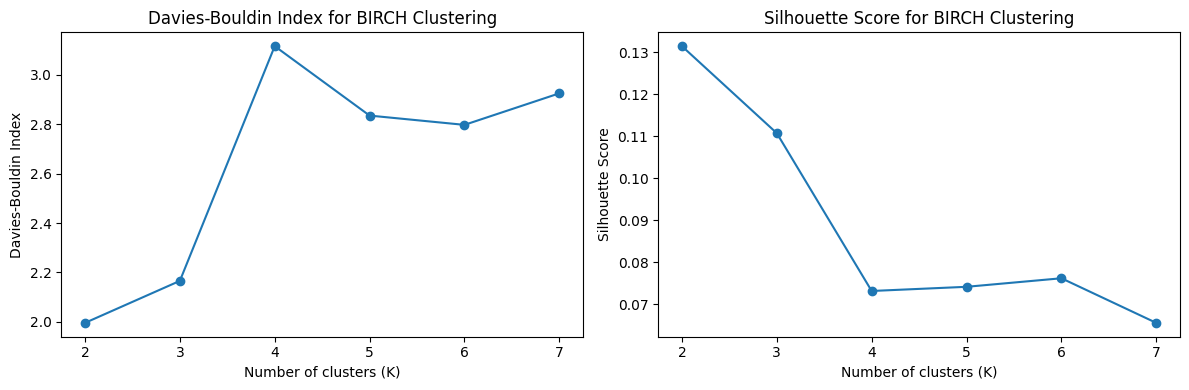

In [100]:
k_range = range(2, 8)

# Initialize lists to store metrics
db_scores = []
silhouette_scores = []

# Evaluate metrics for different numbers of clusters
for k in k_range:
    birch = Birch(n_clusters=k)
    labels = birch.fit_predict(df_scaled)
    
    # Davies-Bouldin Index
    db_index = davies_bouldin_score(df_scaled, labels)
    db_scores.append(db_index)
    
    # Silhouette Score
    sil_score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(sil_score)

    # Print the lowest Davies-Bouldin Index and highest Silhouette Score for each K
    print(f'K={k}, Davies-Bouldin Index={db_index:.4f}, Silhouette Score={sil_score:.4f}')

# Plot the Davies-Bouldin Index
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(k_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for BIRCH Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')

# Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for BIRCH Clustering')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [90]:
birch = Birch(n_clusters=2)
birch.fit(df_scaled)
labels = birch.labels_
for cluster_id in range(2):
    instances_in_cluster = np.where(labels == cluster_id)[0]
    print(f'Cluster {cluster_id}: {instances_in_cluster}')

Cluster 0: [  4   5   6   8   9  10  12  13  14  16  19  20  21  23  24  25  26  27
  28  34  35  38  39  40  41  42  44  46  47  48  50  52  53  54  57  58
  59  62  63  65  67  68  71  72  75  76  77  79  80  81  82  83  85  86
  87  91  93  94  95  96  97 100 101 102 103 105 106 108 110 111 112 114
 115 116 117 118 119 123 124 125 126 127 128 129 130 132 133 135 136 142
 143 145 147 149 151 152 154 157 158 159 161 163 164 165 167 168 171 173
 175 176 178 180 182 183 185 186 187 188 189 191 193 194 195 196 197 200
 203 205 206 207 208 209 210 215 218 219 220 222 223 224 225 227 229 230
 231 232 233 235 236 237 238 239 240 243 244 246 247 248 249 251 254 255
 256 257 258 259 260 263 266 268 269 270 278 280 281 282 283 284 285 286
 288 289 290 291 293 294 295 296 298 299 300 301 302 303 304 305 306 307
 308 310 311 312 313 314 315 316 317 318 319 320 321 323 324 325 326 327
 328 329 331 332 333 334 335 336 337 339 342 343 344 345 346 347 348 349
 350 351 353 354 356 358 359 360 361 362

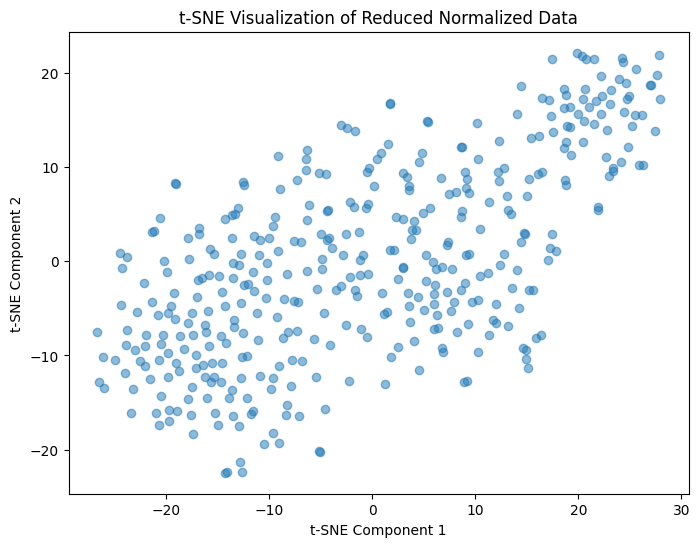

In [92]:
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(df_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Reduced Normalized Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

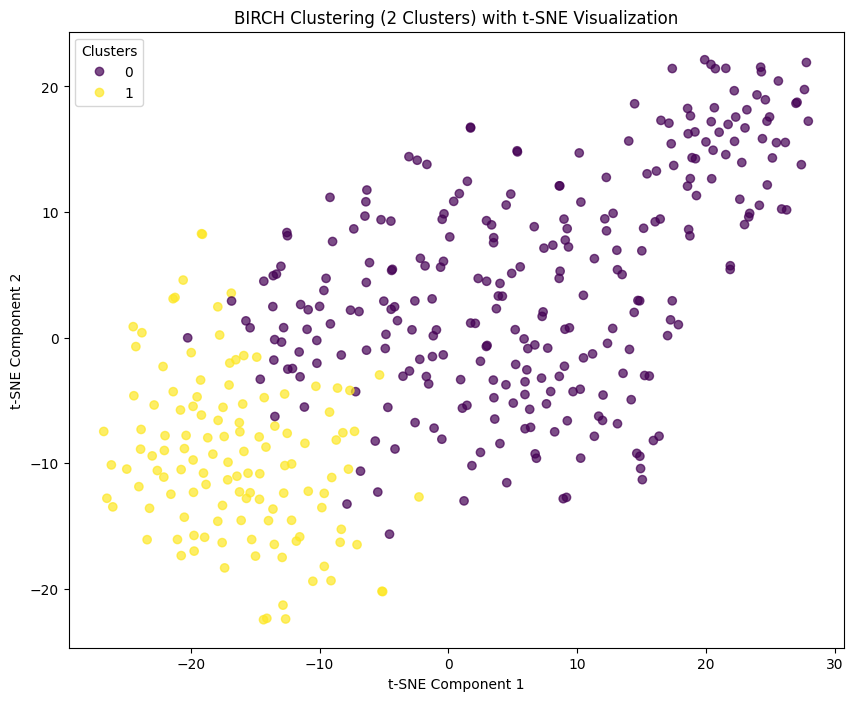

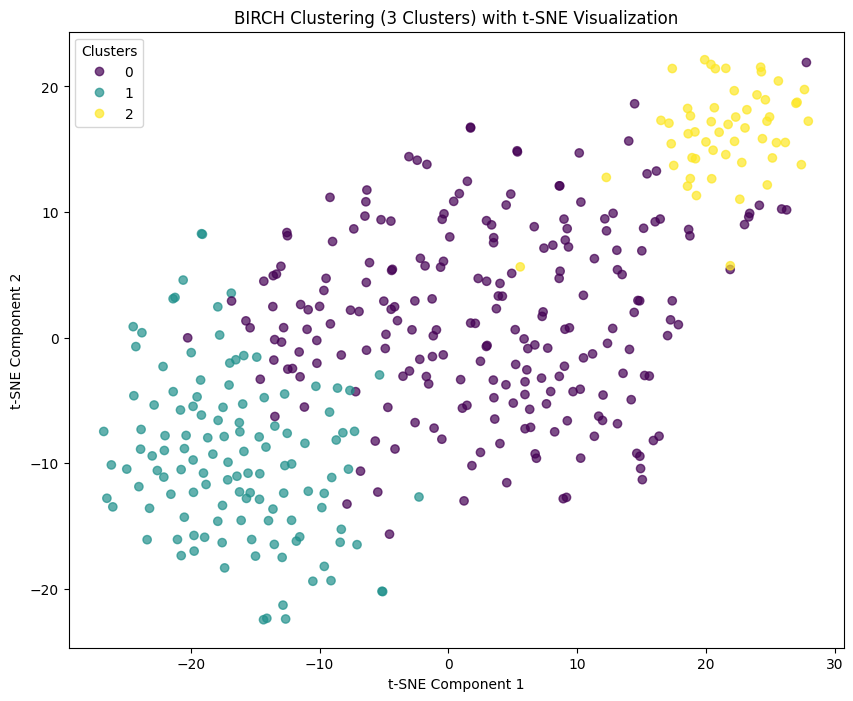

In [101]:
# Apply BIRCH for clustering with 2 clusters
birch_2_clusters = Birch(threshold=0.5, n_clusters=2)
birch_2_clusters.fit(df_scaled)
cluster_labels_2 = birch_2_clusters.predict(df_scaled)

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(df_scaled)

# Visualize the clustering results with t-SNE for 2 clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels_2, cmap='viridis', alpha=0.7)
plt.title('BIRCH Clustering (2 Clusters) with t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

# Apply BIRCH for clustering with 3 clusters
birch_3_clusters = Birch(threshold=0.5, n_clusters=3)
birch_3_clusters.fit(df_scaled)
cluster_labels_3 = birch_3_clusters.predict(df_scaled)

# Visualize the clustering results with t-SNE for 3 clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels_3, cmap='viridis', alpha=0.7)
plt.title('BIRCH Clustering (3 Clusters) with t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

## Affinity Propagation

In [9]:
def plot_k_vs_preference(X, preference_range):
    num_clusters_list = []

    for preference in preference_range:
        model = AffinityPropagation(preference=preference)
        labels = model.fit_predict(X)
        unique_labels = np.unique(labels)
        num_clusters = len(unique_labels)
        num_clusters_list.append(num_clusters)

    plt.figure(figsize=(10, 6))
    plt.plot(preference_range, num_clusters_list, marker='o')
    plt.title('Number of Clusters vs. Preference Value')
    plt.xlabel('Preference Value')
    plt.ylabel('Number of Clusters')
    plt.show()

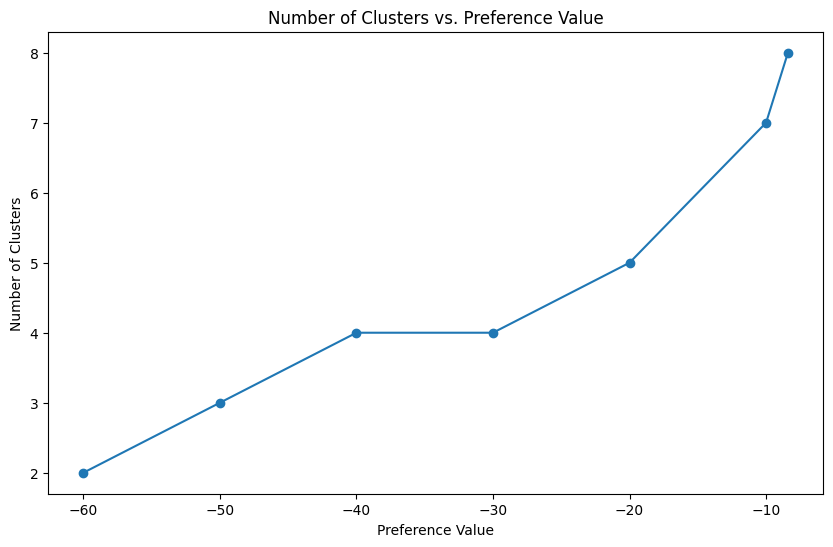

In [19]:
preference_range = [-60,-50, -40, -30, -20, -10, -8.4]

plot_k_vs_preference(df_scaled, preference_range)

Preference=-60, Davies-Bouldin Index=1.6779, Silhouette Score=0.2099
Preference=-50, Davies-Bouldin Index=2.1829, Silhouette Score=0.1032
Preference=-40, Davies-Bouldin Index=2.8670, Silhouette Score=0.0808
Preference=-30, Davies-Bouldin Index=2.8619, Silhouette Score=0.0827
Preference=-20, Davies-Bouldin Index=3.3933, Silhouette Score=0.0556
Preference=-10, Davies-Bouldin Index=3.2691, Silhouette Score=0.0462
Preference=-8.4, Davies-Bouldin Index=3.5010, Silhouette Score=0.0450


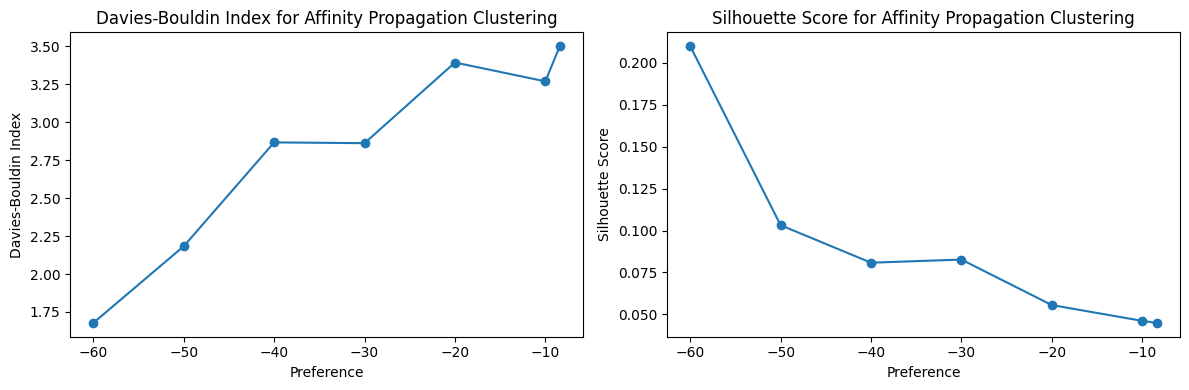

In [20]:
# Initialize lists to store metrics
db_scores = []
silhouette_scores = []

# Evaluate metrics for different Prefference values
for p in preference_range:
    affinity = AffinityPropagation(max_iter=1000, preference=p)
    labels = affinity.fit_predict(df_scaled)
    
    # Davies-Bouldin Index
    db_index = davies_bouldin_score(df_scaled, labels)
    db_scores.append(db_index)
    
    # Silhouette Score
    sil_score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(sil_score)

    # Print the lowest Davies-Bouldin Index and highest Silhouette Score for each Preference
    print(f'Preference={p}, Davies-Bouldin Index={db_index:.4f}, Silhouette Score={sil_score:.4f}')

# Plot the Davies-Bouldin Index
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(preference_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Affinity Propagation Clustering')
plt.xlabel('Preference')
plt.ylabel('Davies-Bouldin Index')

# Plot the Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(preference_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Affinity Propagation Clustering')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [21]:
aff=AffinityPropagation(max_iter=1000,preference=-60)
aff.fit(df_scaled)
cluster_centers_indices = aff.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
P=aff.predict(df_scaled)

In [26]:
labels= aff.labels_
for cluster_id in range(2):
    instances_in_cluster = np.where(labels == cluster_id)[0]
    print(f'Cluster {cluster_id}: {instances_in_cluster}')

Cluster 0: [  0   1   2   3   4   5   6   7  10  11  12  14  15  16  17  18  20  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  41
  42  43  44  45  46  47  49  51  52  53  54  55  56  58  60  61  62  63
  64  65  66  67  69  70  71  72  73  74  76  77  78  79  80  81  83  84
  86  87  88  89  90  92  94  96  98  99 100 101 104 107 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 126 127 131 132 133 134
 135 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 165 166 168 169 170 171 172 173
 174 175 176 177 178 179 181 183 184 185 187 189 190 192 193 195 196 197
 198 199 201 202 203 204 205 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 250 252 253 255 257 258
 259 260 261 262 263 264 265 267 268 270 271 272 273 274 275 276 277 278
 279 280 282 283 285 286 287 288 289 291

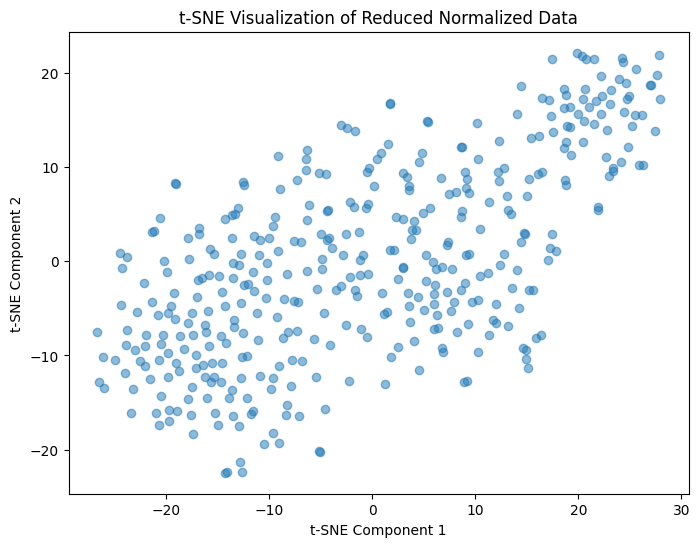

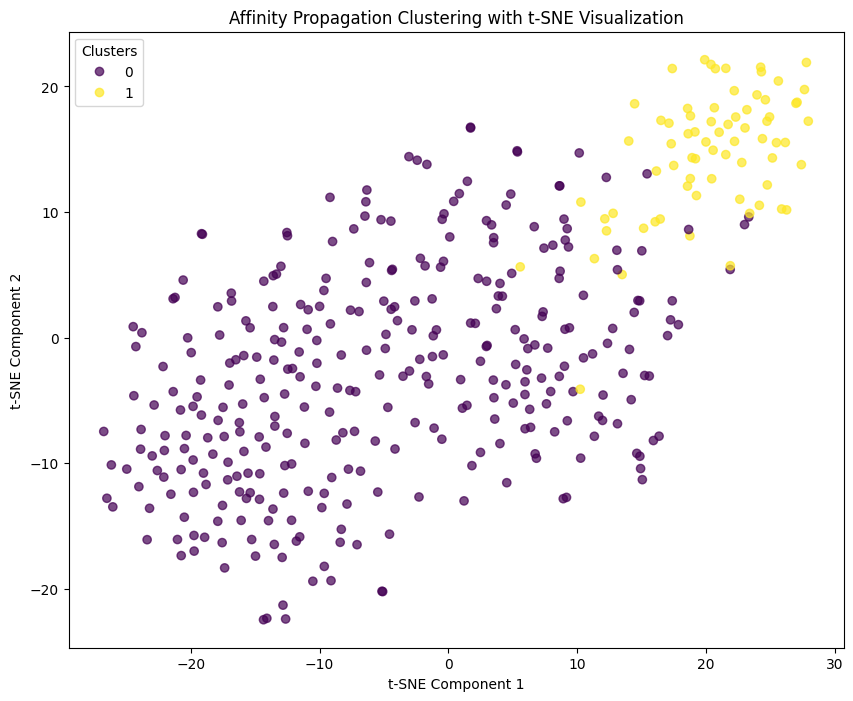

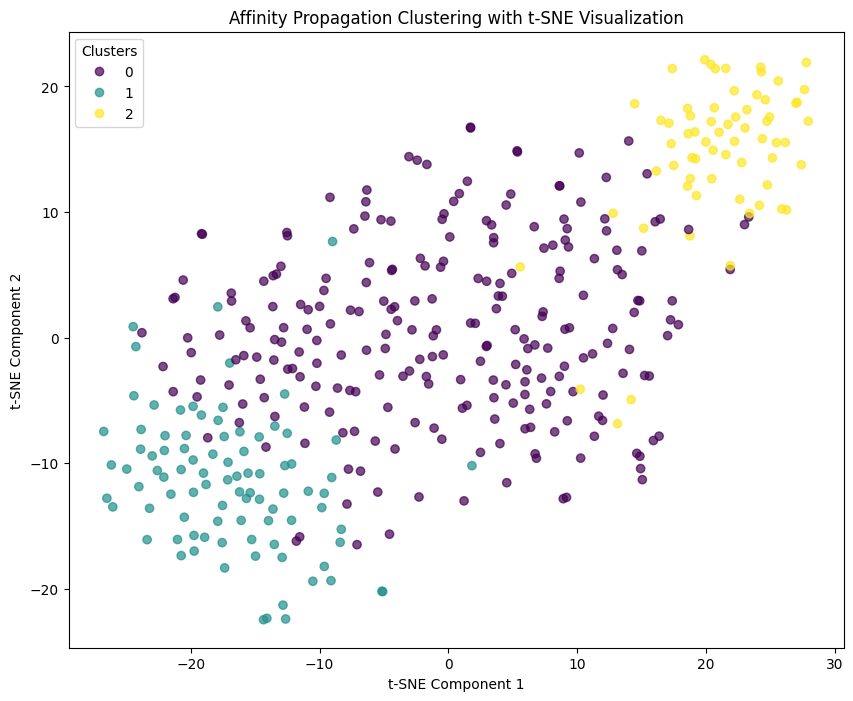

In [84]:
tsne = TSNE(n_components=2, random_state=42)
reduced = tsne.fit_transform(df_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of Reduced Normalized Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

reduced = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=P, cmap='viridis', alpha=0.7)
plt.title('Affinity Propagation Clustering with t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

aff3=AffinityPropagation(max_iter=1000,preference=-50)
aff3.fit(df_scaled)
cluster_centers_indices3 = aff.cluster_centers_indices_
n_clusters_3 = len(cluster_centers_indices)
P=aff3.predict(df_scaled)
reduced = tsne.fit_transform(df_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=P, cmap='viridis', alpha=0.7)
plt.title('Affinity Propagation Clustering with t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()